In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerias
import os
from pandas import read_csv
%matplotlib inline

import numpy as np
import pandas as pd
#graficas
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# directorios (path) de entrada:
path_in="/content/drive/MyDrive/Maestria/Proyecto Integrador 2/Modelos Finales/Data Set 2 corporate_rating_exo.csv"
data = pd.read_csv(path_in,delimiter=',' )
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2015-11-27,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.049351,7.057088,15.565438,0.058638,3.906655,0.110833,2.0,236.252,5.6,-0.145008
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2014-02-13,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.048857,6.460618,15.914250,0.067239,4.002846,0.098333,3.5,234.719,6.7,0.020161
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2015-03-06,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.044334,10.491970,18.888889,0.074426,3.483510,0.110833,2.0,236.252,5.6,-0.145008
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2012-06-15,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,-0.012858,4.080741,6.901042,0.028394,4.581150,0.120833,4.6,227.223,8.5,0.089855
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,2016-10-24,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.053770,8.293505,15.808147,0.058065,3.857790,0.263750,0.7,237.761,5.0,0.195543


ANALISIS EDA Y PREPARACION DE DATOS

In [4]:
data.Rating.value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

Observamos que el conjunto de datos está muy desequilibrado. Tenemos 671 BBB pero solo 1 D. Sin embargo, estamos trabajando con calificaciones de diferentes compañías como Moody's, Standard & Poor's y más. Se decide simplificar las etiquetas, de acuerdo con el riesgo de clasificación.

In [5]:
rating_dict = {'AAA':'Lowest Risk',
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk',
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk',
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'In Default'}

data.Rating = data.Rating.map(rating_dict)

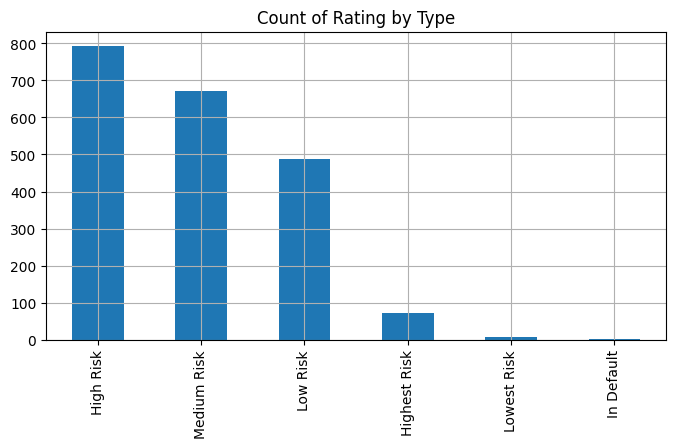

In [6]:
ax = data['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

Pasamos de 10 etiquetas a 6 etiquetas

Se mantiene  la falta de Calificaciones Crediticias clasificadas como de Menor Riesgo y En Default tendremos que eliminarlas de la tabla.

In [7]:
data = data[data['Rating']!='Lowest Risk'] # filter Lowest Risk
data = data[data['Rating']!='In Default']  # filter In Default
data.reset_index(inplace = True, drop=True) # reset index

In [8]:
data.Rating.value_counts()

High Risk       792
Medium Risk     671
Low Risk        487
Highest Risk     71
Name: Rating, dtype: int64

In [9]:
# Statistical summary con el data set agregado y depurado
data.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.438715,48.426558,6.540891e+03,1.452142,38.138233,0.147028,2.248095,233.345537,6.670905,0.067018
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,9.002047,530.161001,1.778797e+05,19.521704,760.421855,0.080574,1.529972,4.558714,1.388950,0.156324
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,0.098333,-8.500000,191.700000,5.000000,-0.241552
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.028057,6.235759,2.348851e+00,0.073664,2.202394,0.110833,0.700000,231.221000,5.600000,0.007772
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.087424,9.269746,4.361649e+00,0.132758,5.775840,0.120833,2.000000,234.719000,6.700000,0.058543
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.149355,12.898855,7.322553e+00,0.239359,9.500424,0.123750,3.500000,236.252000,7.900000,0.121537
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,2.281250,4.600000,237.761000,9.900000,0.757353


Observamos mucha asimetría en los datos con esta primera exploración. En este caso, significa que la mayoría de las variables del conjunto de datos pueden tener una fuerte presencia de valores atípicos. Tomando como observación la tabla sobre la primera columna:

currentRatio: Este 50% de sus variables entre 1.071 y 2.16. El valor mínimo es -0.932005, sin embargo, el valor máximo es 1725.
El mismo patrón El mismo patrón se puede observar en  columnas, como quickRatio, cashRatio, daysOfSalesOutstanding, netProfitMargin, etc.

In [10]:
import random  # Importa la función sample del módulo random

# Luego, puedes utilizar la función sample para seleccionar una muestra aleatoria de elementos de una secuencia, en este caso, de columnas.
column_list = list(data.columns[6:36])
column_list = random.sample(column_list, 4)  # Aquí se utiliza random.sample
print(column_list)

['quickRatio', 'operatingCashFlowPerShare', 'US GDP Growth Rate', 'netProfitMargin']


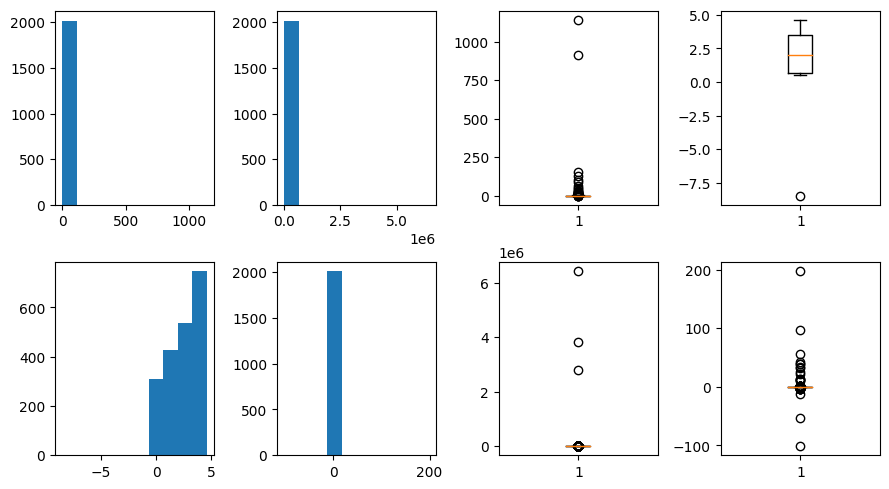

In [11]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(data[column_list[0]])
axes[0, 1].hist(data[column_list[1]])
axes[1, 0].hist(data[column_list[2]])
axes[1, 1].hist(data[column_list[3]])

axes[0, 2].boxplot(data[column_list[0]])
axes[1, 2].boxplot(data[column_list[1]])
axes[0, 3].boxplot(data[column_list[2]])
axes[1, 3].boxplot(data[column_list[3]])

figure.tight_layout()

Por los atipicos tan grandes nopodemos observar el comportamiento real de la distribución. Usaremos la función .skew de pandas en todas las columnas. Debe devolver entre 0 y 1 si una columna se distribuye normalmente. Esta funcion  se utiliza para calcular el sesgo (skewness) de una distribución en una serie de datos, lo que proporciona información sobre la asimetría de la distribución. Un sesgo de cero indica que la distribución es simétrica. Si el sesgo es mayor que cero, la cola derecha de la distribución es más larga o ancha que la izquierda, y si es menor que cero, la cola izquierda es más larga o ancha que la derecha.

In [12]:
data.skew(axis=0)

<ipython-input-12-e0aa39367b90>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew(axis=0)


currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

 Las columnas están extremadamente muy sesgadas-

VALORES ATIPICOS: La definición de valor atípico será la del diagrama de caja, por encima o por debajo de 1,5 x IQR. valores que están por encima del tercer cuartil más 1,5 veces el IQR o por debajo del primer cuartil menos 1,5 veces el IQR se consideran valores atípicos. Es decir, valores que están por encima del tercer cuartil más 1,5 veces el IQR o por debajo del primer cuartil menos 1,5 veces el IQR se consideran valores atípicos.

In [13]:
for c in data.columns[6:36]:

    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(data.loc[(data[c] < fence_low)  ,c])
    upper_out = len(data.loc[(data[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(data)
    print(c, ": "+"{:.2%}".format(prop_out))

currentRatio : 18.01%
quickRatio : 19.05%
cashRatio : 14.84%
daysOfSalesOutstanding : 23.55%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.12%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 22.07%
returnOnEquity : 28.70%
assetTurnover : 15.83%
fixedAssetTurnover : 13.46%
debtEquityRatio : 22.07%
debtRatio : 21.33%
effectiveTaxRate : 28.06%
freeCashFlowOperatingCashFlowRatio : 16.92%
freeCashFlowPerShare : 23.55%
cashPerShare : 17.12%
companyEquityMultiplier : 22.02%
ebitPerRevenue : 24.34%
enterpriseValueMultiple : 23.70%
operatingCashFlowPerShare : 17.66%
operatingCashFlowSalesRatio : 16.87%
payablesTurnover : 14.45%
Federal Funds Rate : 43.34%
US GDP Growth Rate : 0.05%
US CPI : 21.08%
US Unemployment Rate : 3.32%
Variación anual Sector : 33.00%




Este código te permite identificar y evaluar la presencia de valores atípicos en las columnas específicas de los datos. La proporción de valores atípicos se calcula en función de los límites definidos por el rango intercuartil y se imprime para cada columna analizada. Esta información puede ser útil para comprender mejor la calidad y la distribución de los datos en las columnas especificadas.
El resultado  muestra el porcentaje de valores atípicos para cada columna.





Distribucion de los valores atipicos:

In [14]:
data_outlier = data.copy()

for c in data_outlier.columns[6:36]:

    q1 = data_outlier[c].quantile(0.25)
    q3 = data_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr

    for i in range(len(data_outlier)):

        if data.loc[i,c] < fence_low or data.loc[i,c] > fence_high: # if Outlier

            data_outlier.loc[i,c] = 1

        else: # Not Outlier
            data_outlier.loc[i,c] = 0

In [15]:
data_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Federal Funds Rate,US GDP Growth Rate,US CPI,US Unemployment Rate,Variación anual Sector
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2015-11-27,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2014-02-13,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,2015-03-06,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,2012-06-15,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,2016-10-24,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<ipython-input-16-297a0d801afe>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_outlier["total"] = data_outlier.sum(axis=1)


<Axes: >

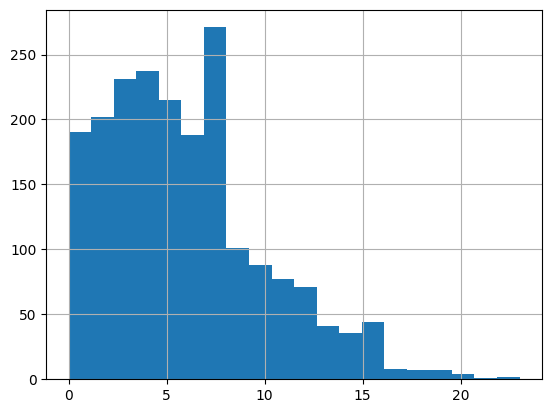

In [16]:
data_outlier["total"] = data_outlier.sum(axis=1)
data_outlier.total.hist(bins = 20)

Solo hasta 400 filas no tienen valores atípicos. La mayoría de las filas tienen valores atípicos frente a la definición del IQR. Datos los pocos datos, decidimos no eliminar atipicos, estos podrian ser utiles en el modelo. Igulamente las calificadoras de riesgo toman en consideracion esta informacion para cerrar sus conclusiones.  Por lo tanto, no vemos ningún valor en excluir los valores atípicos del conjunto de datos, Sin embargo, se realiza una transformación en los datos para poder reducir su impacto negativo.

Normalizacion de los Datos

In [17]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()

for c in data.columns[6:36]:
    # Escala las columnas al rango [0, 1] y luego aplica la transformación logarítmica
    scaled_column = min_max_scaler.fit_transform(data[[c]].to_numpy()) * 1000
    log_transformed_column = np.log10(scaled_column + 0.01)
    data[c] = log_transformed_column


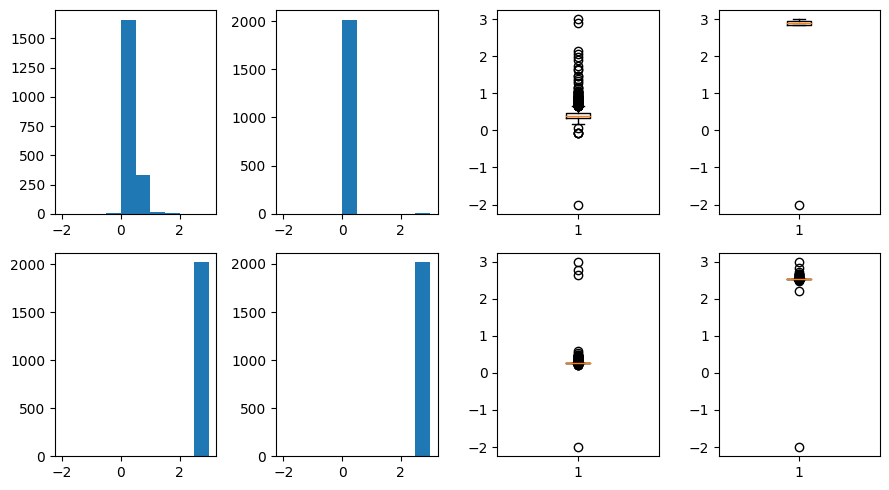

In [18]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(data[column_list[0]])
axes[0, 1].hist(data[column_list[1]])
axes[1, 0].hist(data[column_list[2]])
axes[1, 1].hist(data[column_list[3]])

axes[0, 2].boxplot(data[column_list[0]])
axes[1, 2].boxplot(data[column_list[1]])
axes[0, 3].boxplot(data[column_list[2]])
axes[1, 3].boxplot(data[column_list[3]])

figure.tight_layout()

El impacto de los valores atípicos impacta la  visualización, por lo tanto se realizará una visualizacion sin  valores atípicos, para evaluar la distribución.

In [19]:
data_no_out = data.copy()

for c in data_no_out.columns[6:36]:

    q05 = data_no_out[c].quantile(0.10)
    q95 = data_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    data_no_out.loc[data_no_out[c] > fence_high,c] = data_no_out[c].quantile(0.25)
    data_no_out.loc[data_no_out[c] < fence_low,c] = data_no_out[c].quantile(0.75)


IndexError: ignored

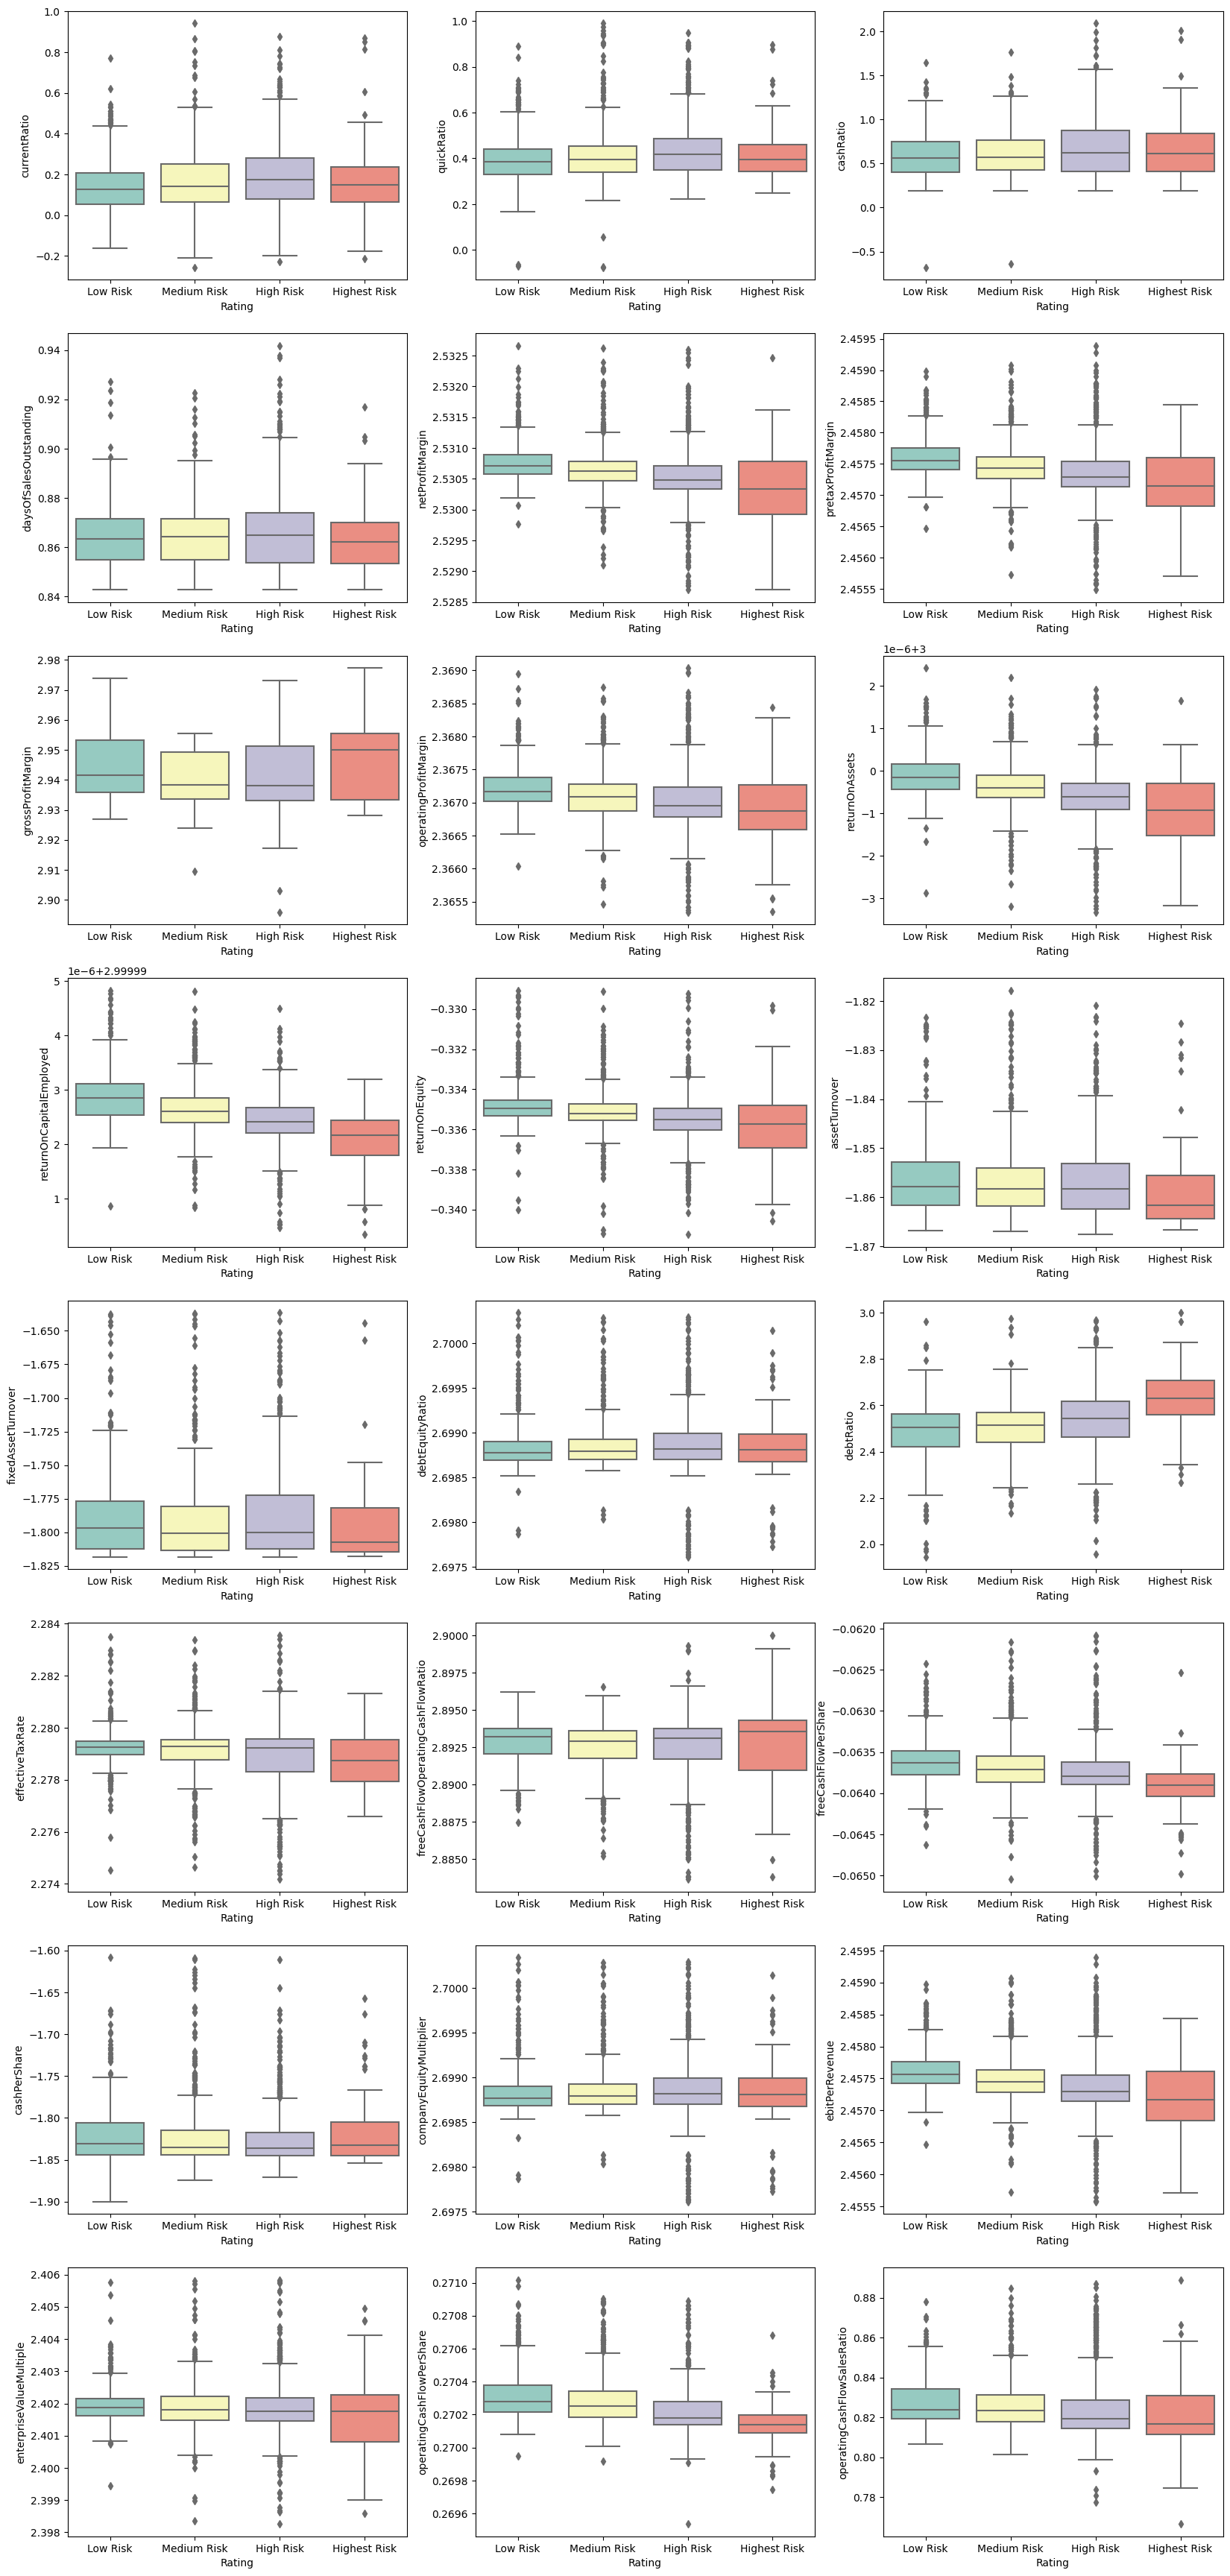

In [20]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0
j = 0

for c in data_no_out.columns[6:36]:

    sns.boxplot(x=data_no_out.Rating, y=data_no_out[c], palette="Set3", ax=axes[i, j])

    if j == 2:
        j=0
        i+=1
    else:
        j+=1

 Diferencia  observable en las medianas y la distribución según la calificación (Riesgo). Esto nos da indicios  que algunas de las variables predictoras están relacionadas de manera significativa con la variable objetivo

MODELAMIENTO Y SELECCION DE MEJOR MODELO

Se abordan los siguientes pasos:

Preparar el conjunto de datos
Dividir en el entrenamiento y la prueba
Transformar/Codificar las etiquetas de las variables
PExplorar diferents modelos de clasificacion
Compara el desempeño de todos los modelos.
Seleccionar un  modelo ganador y ajuste los hiperparámetros para obtener una mayor precisión.
Evaluación detallada de resultado con una matriz de confusión y diferentes medidas.
Características más importantes para predecir la calificación.

Preparacion del Data SET

In [21]:
#codificar las variables categóricas en las columnas 'Sector' y 'Rating'
le = preprocessing.LabelEncoder()
le.fit(data.Sector)
data.Sector = le.transform(data.Sector) # encode sector
le.fit(data.Rating)
data.Rating = le.transform(data.Rating) # encode rating

In [22]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2, random_state = 1234)

In [23]:
X_train, y_train = df_train.iloc[:,5:36], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,5:36], df_test.iloc[:,0]

Entrenamiento de Modelos

In [24]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [25]:
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

XG BOOST

In [26]:
from sklearn import metrics  # Importa el módulo de métricas de scikit-learn
from xgboost import XGBClassifier


# Resto de tu código
XGB_model = XGBClassifier(objective='multi:softmax', num_class=4)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:", Accuracy_XGB)


XGB Accuracy: 0.6814814814814815


Gradient Boosting Clasifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier  # Importa la clase GradientBoostingClassifier

GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
print("GBT Accuracy:",Accuracy_GBT)


GBT Accuracy: 0.6123456790123457


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier  # Importa la clase RandomForestClassifier

# Resto de tu código
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("Random Forest Accuracy:", Accuracy_RF)


Random Forest Accuracy: 0.6493827160493827


CatBoost

In [29]:
from catboost import CatBoostClassifier  # Importa la clase CatBoostClassifier

# Resto de tu código
CatBoost_model = CatBoostClassifier(iterations=100, random_state=0)  # Puedes ajustar más parámetros según sea necesario
CatBoost_model.fit(X_train, y_train, verbose=100)  # 'verbose' muestra información sobre el proceso de ajuste
y_pred_CatBoost = CatBoost_model.predict(X_test)
Accuracy_CatBoost = metrics.accuracy_score(y_test, y_pred_CatBoost)
print("CatBoost Accuracy:", Accuracy_CatBoost)


Learning rate set to 0.5
0:	learn: 1.2014451	total: 98.3ms	remaining: 9.73s
99:	learn: 0.1548586	total: 3.91s	remaining: 0us
CatBoost Accuracy: 0.6444444444444445


Suppor Vector Machine

In [30]:
##from sklearn import svm  # Importa el módulo de máquinas de soporte vectorial (SVM)


#SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234)
#SVC_model.fit(X_train, y_train)
#y_pred_SVM = SVC_model.predict(X_test)
#Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
#print("SVM Accuracy:",Accuracy_SVM)


Red Neuronal

In [31]:
#from sklearn.neural_network import MLPClassifier  # Importa la clase MLPClassifier


#MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
#MLP_model.fit(X_train, y_train)
#y_pred_MLP = MLP_model.predict(X_test)
#Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
#print("MLP Accuracy:",Accuracy_MLP)

Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB  # Importa la clase GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(y_test, y_pred_GNB)
print("GNB Accuracy:",Accuracy_GNB)

GNB Accuracy: 0.32098765432098764


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importa la clase LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.4222222222222222


Quadratic Analysis Discrimant

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # Importa la clase QuadraticDiscriminantAnalysis
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train,y_train)
y_pred_QDA = QDA_model.predict(X_test)
Accuracy_QDA = metrics.accuracy_score(y_test, y_pred_QDA)
print("QDA Accuracy:",Accuracy_QDA)

QDA Accuracy: 0.37777777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


K Vencinos Cercanos

In [35]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.4839506172839506


Regresion Logistica

In [36]:
#LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
#LR_model = LR_model.fit(X_train, y_train)
#y_pred_LR = LR_model.predict(X_test)
#Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
#print("LR Accuracy:",Accuracy_LR)

Comparacion de Resultados

In [37]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_GNB,
                 Accuracy_LDA, Accuracy_QDA, Accuracy_KNN, Accuracy_CatBoost]

model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest',
              'Naive Bayes', 'Linear Discriminat', 'Quadratic Discriminat',
              'KNN', 'CatBoost_model']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

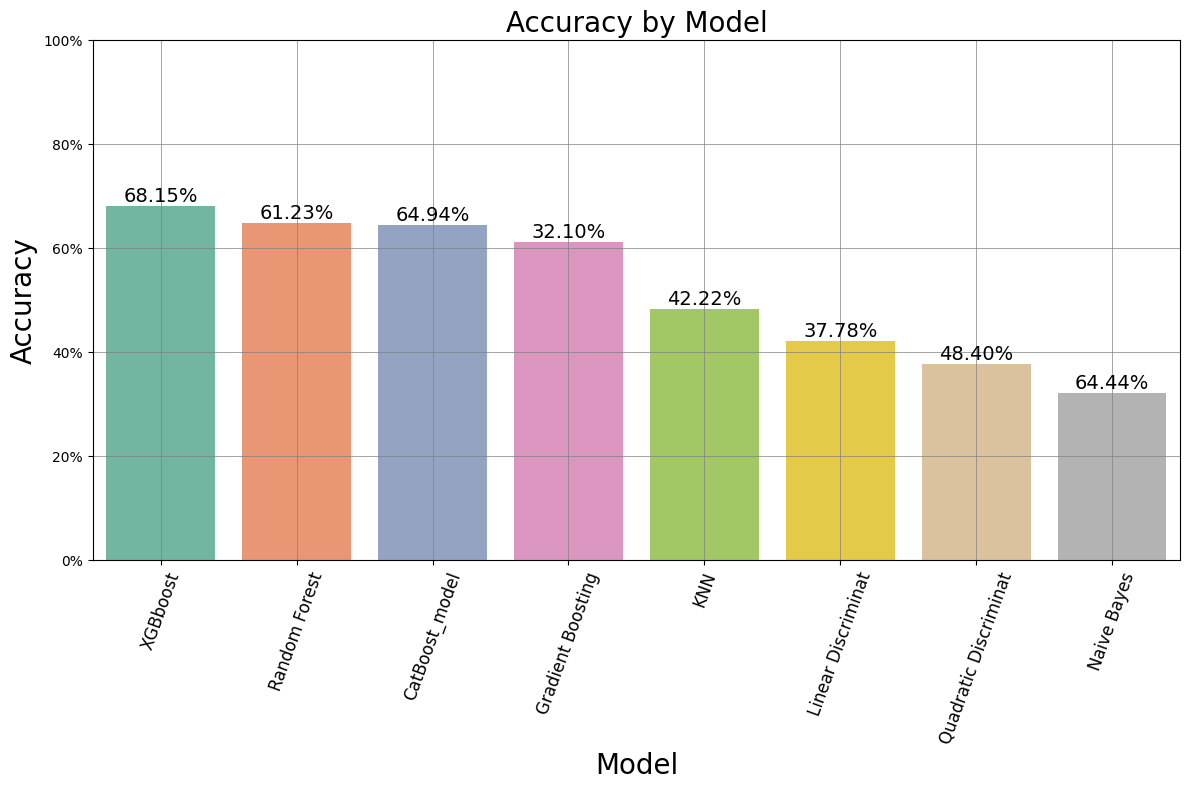

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 8))

# Ordenar el DataFrame por Accuracy en orden descendente
df_accuracy_sorted = df_accuracy.sort_values(by='Accuracy', ascending=False)

# Obtener el orden resultante
order = df_accuracy_sorted['Model'].tolist()

# Cambiar la paleta de colores
ax = sns.barplot(x='Model', y='Accuracy', data=df_accuracy, order=order, palette='Set2')  # Aquí, 'Set2' es el nombre de la paleta
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Añadir etiquetas con porcentajes en cada barra
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{df_accuracy.loc[i, 'Accuracy']:.2%}",
            ha='center', va='bottom', fontsize=14, color='black')

plt.tight_layout()
plt.show()


XGBOOST

El XGboost se selecciona  como el mejor modelo

Para aumentar aún más el rendimiento, se usará un enfoque de validación cruzada

In [39]:
#librería XGBoost, biblioteca optimizada para implementar algoritmos de potenciación de árboles
import xgboost as xgb  # Importa el módulo XGBoost
from xgboost import XGBClassifier  # Puedes mantener esta importación si utilizas XGBClassifier

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [40]:
#Creacion de Diccionario de Hiperparametros
params = XGB_model.get_xgb_params()

In [41]:
params

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 4}

In [42]:
#Usaremos el parámetro merror error de la clasificación
params['eval_metric'] = "merror"

In [43]:
#Se define realizar un máximo de 1000 iteraciones ( 1000 árboles)
num_boost_round = 1000

In [44]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50,
    verbose_eval=30)

print("Best merror: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-merror:0.43951
[30]	Test-merror:0.32840
[60]	Test-merror:0.31852
[90]	Test-merror:0.32593
[98]	Test-merror:0.32099
Best merror: 0.31 with 49 rounds


Se encuentra el menor error, en la ronda 111. Baja de 0.34 a 0.31

Se plantea un enfoque de validación cruzada,  para  ajustar los otros hiperparámetros, este permite ejecutar la validación cruzada en nuestro conjunto de datos de entrenamiento y devuelve una puntuación media de merror. Usaremos una k = 5 para cada parámetro.

In [45]:

#seed=42: Semilla para reproducibilidad.
#nfold=5: Número de pliegues (folds) para la validación cruzada.
#metrics={'merror'}: Tipo de métrica a evaluar durante la validación cruzada (en este caso, el error de clasificación).
#early_stopping_rounds=50: Criterio de detención temprana. Si el modelo no muestra mejoras en el conjunto de validación después de 50 rondas, se detiene el entrenamiento.
#verbose_eval=30: Muestra información de progreso cada 30 rondas.
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'merror'},
    early_stopping_rounds=50,
    verbose_eval=30
)
cv_results.tail()

[0]	train-merror:0.22911+0.00719	test-merror:0.43254+0.01984
[30]	train-merror:0.00000+0.00000	test-merror:0.35642+0.03163
[60]	train-merror:0.00000+0.00000	test-merror:0.34280+0.03012
[90]	train-merror:0.00000+0.00000	test-merror:0.33785+0.02984
[120]	train-merror:0.00000+0.00000	test-merror:0.33290+0.03330
[150]	train-merror:0.00000+0.00000	test-merror:0.33414+0.03354
[180]	train-merror:0.00000+0.00000	test-merror:0.33599+0.04006
[181]	train-merror:0.00000+0.00000	test-merror:0.33475+0.03880


,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
127,0.0,0.0,0.332901,0.033164
128,0.0,0.0,0.334140,0.034554
129,0.0,0.0,0.333517,0.038016
130,0.0,0.0,0.332898,0.037361
131,0.0,0.0,0.331665,0.034637


In [46]:
cv_results['test-merror-mean'].min()

0.33166494668042656

Un valor de 0.34776784007950157 en la métrica de error  indica que, en promedio, alrededor del 34.78% de las predicciones en el conjunto de prueba fueron incorrectas durante la validación cruzada- 34.78% de las predicciones en el conjunto de prueba fueron incorrectas durante la validación cruzada

Optimizacion de Hiperparametros

Ajuste de  parámetros para minimizar el merror en la validación cruzada y se comprobará el rendimiento de nuestro modelo en el conjunto de datos de prueba.

In [47]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,12)
    for min_child_weight in range(5,8)
]

In [48]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=50,
        verbose_eval=False

    )
    # Update best merror
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

CV with max_depth=5, min_child_weight=5
	MAE 0.3452872377020984 for 90 rounds
CV with max_depth=5, min_child_weight=6
	MAE 0.3533195734434124 for 95 rounds
CV with max_depth=5, min_child_weight=7
	MAE 0.34898903030997974 for 46 rounds
CV with max_depth=6, min_child_weight=5
	MAE 0.34713717845812786 for 131 rounds
CV with max_depth=6, min_child_weight=6
	MAE 0.34094140580208687 for 109 rounds
CV with max_depth=6, min_child_weight=7
	MAE 0.3477449069296334 for 120 rounds
CV with max_depth=7, min_child_weight=5
	MAE 0.34713717845812786 for 72 rounds
CV with max_depth=7, min_child_weight=6
	MAE 0.33907999847112336 for 91 rounds
CV with max_depth=7, min_child_weight=7
	MAE 0.3465084279325765 for 67 rounds
CV with max_depth=8, min_child_weight=5
	MAE 0.3415606008485266 for 78 rounds
CV with max_depth=8, min_child_weight=6
	MAE 0.3483717463593624 for 125 rounds
CV with max_depth=8, min_child_weight=7
	MAE 0.33473989985857894 for 85 rounds
CV with max_depth=9, min_child_weight=5
	MAE 0.3397087

Obtenemos la mejor puntuación con un max_depth de 11 y min_child_weight de 6

In [49]:
params['max_depth'] = 11
params['min_child_weight'] = 6

In [50]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [51]:
#Define initial best params and MAE
min_merror = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=10,
        verbose_eval=False
    )

    # Update best MAE
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (subsample,colsample)

print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

CV with subsample=1.0, colsample=1.0
	MAE 0.33353399839467957 for 49 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.34714100064977255 for 26 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.32981118373275237 for 47 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.37004357298474944 for 11 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.3421778847991438 for 43 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.3508580820242327 for 21 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.3384780032870848 for 47 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.33599548981385924 for 42 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.3496101364522417 for 37 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.34341627489202303 for 50 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.3489909414058021 for 55 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.34837939074265184 for 44 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.34280663532469513 for 71 rounds
CV with subsample

In [52]:
params['subsample'] =0.8
params['colsample_bytree'] = 0.9

El parámetro "ETA" en el contexto de XGBoost se refiere a la tasa de aprendizaje (learning rate) que controla la contribución de cada árbol en un modelo XGBoost. La tasa de aprendizaje es un hiperparámetro importante en algoritmos de aumento de gradiente como XGBoost y Gradient Boosting.

El valor de "ETA" generalmente se establece en un rango entre 0 y 1, y controla la rapidez con la que el algoritmo de XGBoost ajusta los pesos de los árboles en cada iteración. Un valor más bajo de "ETA" significa que el algoritmo se ajustará más lentamente, lo que puede ser útil para evitar sobreajuste. Por otro lado, un valor más alto de "ETA" permite un ajuste más rápido, pero puede aumentar el riesgo de sobreajuste.

La elección de un valor adecuado para "ETA" depende del problema y de la cantidad de datos disponibles. Un valor común para "ETA" es 0.01 o 0.3, pero puede ser necesario ajustarlo mediante validación cruzada u otras técnicas de optimización de hiperparámetros para encontrar el valor óptimo que maximice el rendimiento del modelo.








In [53]:
%time
# This can take some time…
min_merror = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['merror'],
            early_stopping_rounds=10
)
    # Update best score
    mean_mae = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = eta
print("Best params: {}, merror: {}".format(best_params, min_merror))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
CV with eta=0.3
	MAE 0.34341627489202303 for 50 rounds

CV with eta=0.2
	MAE 0.3415663341359936 for 55 rounds

CV with eta=0.1
	MAE 0.34280090203722813 for 64 rounds

CV with eta=0.05
	MAE 0.36322669418644654 for 25 rounds

CV with eta=0.01
	MAE 0.38055842219928904 for 26 rounds

CV with eta=0.005
	MAE 0.378095019684287 for 45 rounds

Best params: 0.3, merror: 0.34466995375148113


In [54]:
params['eta'] = .3

Resultados
Estos son los parámetros finales de nuestro modelo tuneado

In [55]:
params

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'device': None,
 'eval_metric': 'merror',
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 11,
 'max_leaves': None,
 'min_child_weight': 6,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 4,
 'eta': 0.3}

Entrenamiento con Mejores Hiperparametros

In [56]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=1000,
    verbose_eval=100
)

[0]	Test-merror:0.45679
[100]	Test-merror:0.33333
[200]	Test-merror:0.31852
[300]	Test-merror:0.33333
[400]	Test-merror:0.34074
[500]	Test-merror:0.35556
[600]	Test-merror:0.35062
[700]	Test-merror:0.35309
[800]	Test-merror:0.35062
[900]	Test-merror:0.34815
[999]	Test-merror:0.35062


In [57]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    verbose_eval=100,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-merror:0.45679
[100]	Test-merror:0.33333
[199]	Test-merror:0.31605


In [58]:
metrics.accuracy_score(best_model.predict(dtest), y_test)

0.6839506172839506

No llegamos en un modelo mejorado con esta afinación

Matriz de Confusion

In [59]:
cm = confusion_matrix(y_test, y_pred_XGB)

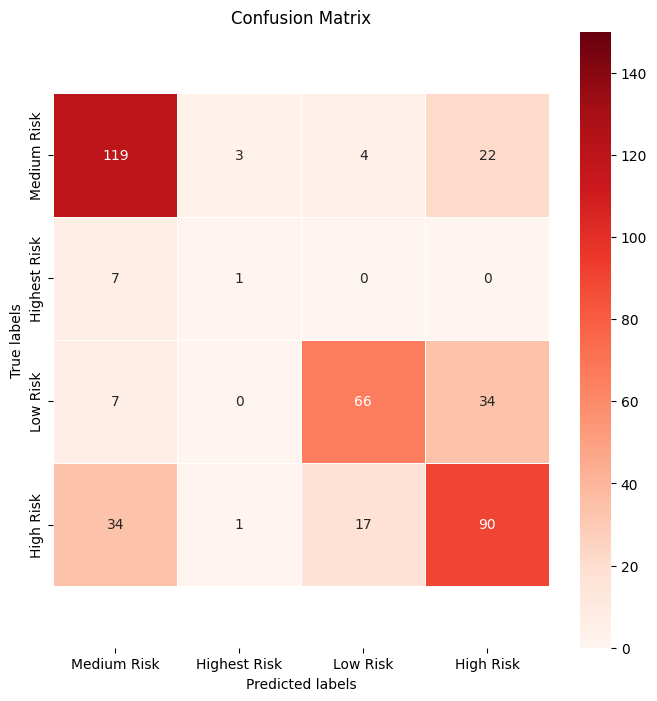

In [60]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds") # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk'])
ax.yaxis.set_ticklabels(['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']);

# This part is to correct a bug from the heatmap funciton from pyplot
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

Dado el hecho de que el conjunto de datos está muy desequilibrado, se ha logrado una precisión muy baja (en realidad 0) para empresas muy arriesgadas.

Precisión, recall y F1

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_XGB, target_names = ['Medium Risk','Highest Risk', 'Low Risk', 'High Risk']))

              precision    recall  f1-score   support

 Medium Risk       0.71      0.80      0.76       148
Highest Risk       0.20      0.12      0.15         8
    Low Risk       0.76      0.62      0.68       107
   High Risk       0.62      0.63      0.63       142

    accuracy                           0.68       405
   macro avg       0.57      0.54      0.55       405
weighted avg       0.68      0.68      0.68       405



El volumen de datos en las  etiquetas en el Medium Risk ha mejorado su clasificación. Sin embargo, en general hemos logrado una buena clasificación para la mayoría, con la excepción de Mayor Riesgo. Esto se debe al poco volumen de datos.

VARIABLES MAS IMPORTANTES

En nuestra tarea de cata identificaremos qué características fueron las más valiosas para nuestro modelo. En nuestro primer paso comprobaremos si por casualidad podemos aumentar la precisión de nuestro modelo extrayendo una característica.

In [62]:
#Evalúa la precisión del XGBoost condiferentes conjuntos de características seleccionadas basadas en su importancia, comenzando desde aquellas con mayor importancia hasta las menos importantes.
thresholds = sorted(XGB_model.feature_importances_)

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=31, Accuracy: 68.15%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=30, Accuracy: 68.40%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=29, Accuracy: 68.40%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=28, Accuracy: 69.38%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=27, Accuracy: 69.14%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=26, Accuracy: 69.63%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.023, n=25, Accuracy: 67.41%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.023, n=24, Accuracy: 68.15%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.024, n=23, Accuracy: 68.89%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.025, n=22, Accuracy: 68.15%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=21, Accuracy: 67.65%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=20, Accuracy: 67.90%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=19, Accuracy: 64.69%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.027, n=18, Accuracy: 65.68%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.027, n=17, Accuracy: 64.94%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=16, Accuracy: 63.95%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=15, Accuracy: 60.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=14, Accuracy: 60.99%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.028, n=13, Accuracy: 61.23%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.029, n=12, Accuracy: 58.02%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.029, n=11, Accuracy: 58.52%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.036, n=10, Accuracy: 57.78%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.037, n=9, Accuracy: 54.57%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.042, n=8, Accuracy: 51.85%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.042, n=7, Accuracy: 50.62%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.045, n=6, Accuracy: 47.90%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.050, n=5, Accuracy: 42.47%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.056, n=4, Accuracy: 44.20%
Thresh=0.058, n=3, Accuracy: 45.19%
Thresh=0.061, n=2, Accuracy: 47.16%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.082, n=1, Accuracy: 44.20%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Al utilizar únicamente las dos características más importantes (umbral 0.074), el modelo logra un 47.16% de precisión. Sin embargo, si se limita a solo la característica más importante (umbral 0.089), la precisión se reduce a un 44.20%. La precisión del modelo puede variar significativamente dependiendo de la cantidad y la calidad de las características seleccionadas.

INTERPRETABILIDAD

Se plantean las siguientes propuestas para analizar la importancia de las variables

Caracteristicas mas importantes en el XGBOOST: El largo de las barras indica la frecuencia de uso de cada característica para realizar divisiones, y valores más altos indican una mayor importancia según el criterio de peso. La importancia de una característica basada en 'weight' se calcula contando la frecuencia con la que se utiliza la característica para dividir los nodos a lo largo de todos los árboles en el modelo. Cuanto más frecuentemente se utiliza una característica para realizar divisiones, mayor será su importancia en términos de peso.


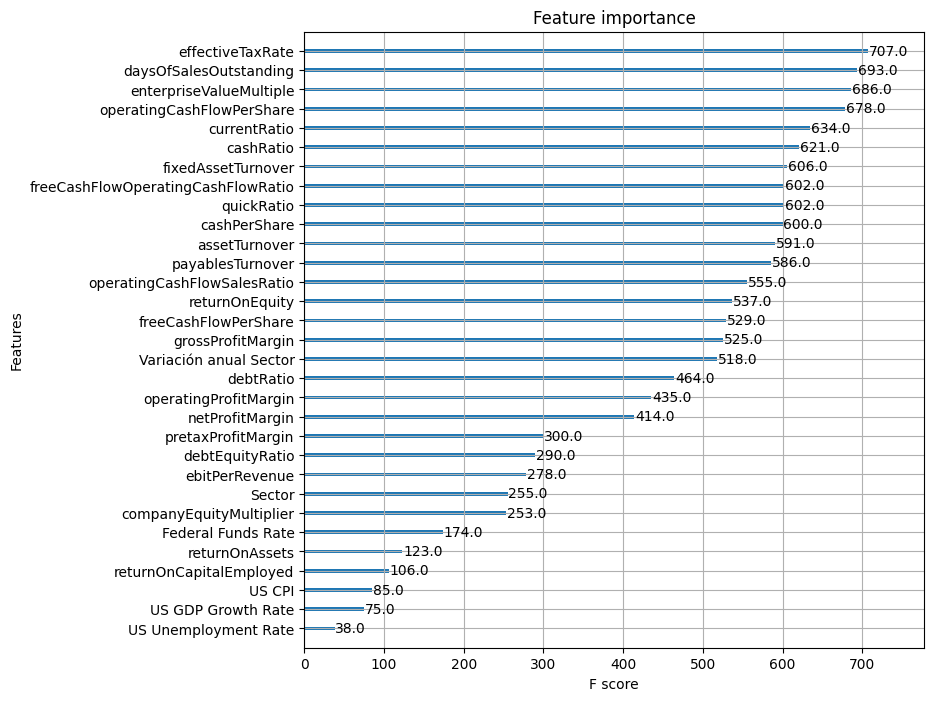

In [63]:

from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))
# xgboost.plot_importance(..., ax=ax)

plot_importance(model, ax=ax)
plt.show()

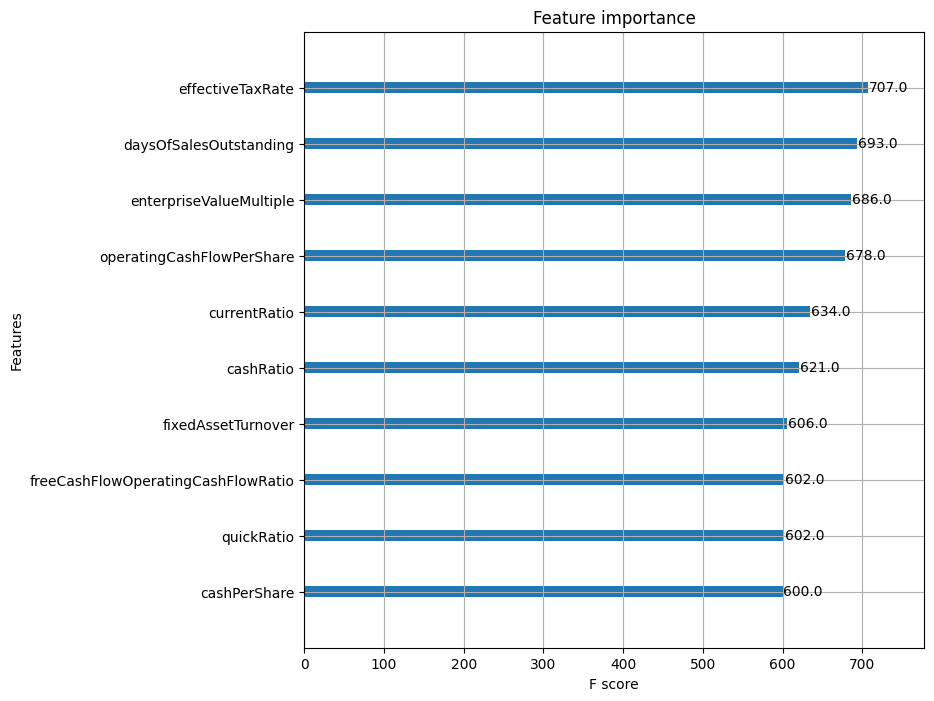

In [64]:

from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
plot_importance(model, ax=ax, importance_type='weight', max_num_features=10)
plt.show()



Analisis SHAP: SHAP proporciona una forma de asignar contribuciones a cada característica en una predicción de modelo.

In [65]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.6 MB/s eta 0:00:00


[19:45:31] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[19:45:32] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


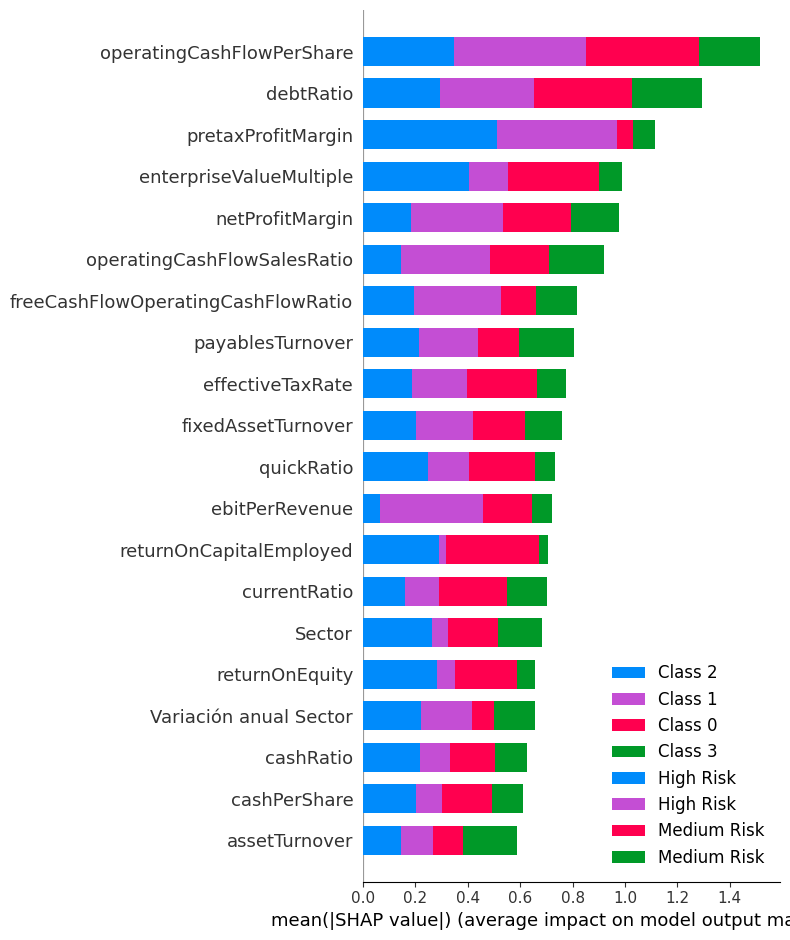

In [66]:
##Los valores SHAP representan la contribución de cada característica a la diferencia entre la predicción del modelo y la media de las predicciones. Utiliza la teoría de juegos y los Coeficientes de Shapley para asignar contribuciones a cada característica en una predicción específica.
import shap
import pandas as pd

# Crear un explainer con tu modelo entrenado
explainer = shap.Explainer(XGB_model)

# Calcular los valores SHAP para tus datos de prueba
shap_values = explainer.shap_values(X_test)

# Obtener las etiquetas originales
original_labels = {
    0: 'High Risk',
    1: 'Highest Risk',
    2: 'Low Risk',
    3: 'Medium Risk'
}

# Crear el gráfico SHAP con un ancho mayor
plt.figure(figsize=(20, 15))
shap.summary_plot(shap_values, X_test, show=False)

# Convertir las clases a etiquetas originales
predicted_labels = [original_labels[label] for label in XGB_model.predict(X_test)]

# Resumen de valores SHAP
shap.summary_plot(shap_values, X_test, class_names=predicted_labels)


Importancia por permutación: Mide cómo cambia el rendimiento de un modelo cuando se permutan aleatoriamente los valores de una característica mientras se mantienen constantes los demás. La idea es que si una característica es importante para el modelo, la permutación aleatoria de sus valores debería afectar negativamente el rendimiento del modelo.

En el gráfico siguiente cada barra representa una característica, y la altura de la barra indica la importancia relativa de esa característica. La importancia se normaliza de manera que la característica más importante tenga una puntuación de 1.

Validaciones Finales (CV _CV KFOLD)

In [67]:
from sklearn.model_selection import cross_val_score

# Definir el modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=4)

# Realizar validación cruzada
cross_val_scores = cross_val_score(XGB_model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir los resultados de cada fold
for i, score in enumerate(cross_val_scores, 1):
    print(f"Fold {i}: {score}")

# Imprimir la precisión media
print(f"Mean Accuracy: {cross_val_scores.mean()}")

Fold 1: 0.6790123456790124
Fold 2: 0.6842105263157895
Fold 3: 0.653250773993808
Fold 4: 0.631578947368421
Fold 5: 0.6439628482972136
Mean Accuracy: 0.6584030883308489


In [68]:
from sklearn.model_selection import StratifiedKFold

# Definir el modelo XGBoost
XGB_model = XGBClassifier(objective='multi:softmax', num_class=4)

# Inicializar StratifiedKFold para la validación cruzada
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Loop sobre las divisiones de la validación cruzada
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Ajustar el modelo con los datos de entrenamiento del fold
    XGB_model.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de validación del fold
    y_pred_fold = XGB_model.predict(X_val_fold)

    # Calcular y mostrar la precisión del fold
    accuracy_fold = metrics.accuracy_score(y_val_fold, y_pred_fold)
    print(f"Fold {i} Accuracy: {accuracy_fold}")

# Nota: Puedes almacenar los resultados de cada fold según sea necesario.


Fold 1 Accuracy: 0.654320987654321
Fold 2 Accuracy: 0.7222222222222222
Fold 3 Accuracy: 0.6728395061728395
Fold 4 Accuracy: 0.6481481481481481
Fold 5 Accuracy: 0.6358024691358025
Fold 6 Accuracy: 0.6296296296296297
Fold 7 Accuracy: 0.6211180124223602
Fold 8 Accuracy: 0.6832298136645962
Fold 9 Accuracy: 0.7018633540372671
Fold 10 Accuracy: 0.6645962732919255
